In [1]:
import pandas as pd
import os
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import matplotlib.pyplot as plt
%matplotlib inline
# Control the default size of figures in this Jupyter 
%pylab inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Populating the interactive namespace from numpy and matplotlib


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [25]:
btc = pd.read_csv('drive/MyDrive/MasterThesis/Data/btc.csv')

In [26]:
btc.corrwith(btc['PriceUSD'])

AdrActCnt           0.669306
AdrBal1in100KCnt   -0.066500
AdrBal1in100MCnt    0.662764
AdrBal1in10BCnt     0.758278
AdrBal1in10KCnt     0.379084
                      ...   
TxTfrValMedNtv     -0.074379
TxTfrValMedUSD      0.726463
VelCur1yr          -0.342200
VtyDayRet180d      -0.202930
VtyDayRet30d       -0.092327
Length: 143, dtype: float64

In [35]:
X_cor = btc.corr().unstack().sort_values().drop_duplicates().dropna()
X_cor = X_cor[(X_cor!=1.000)]

In [39]:
X_cor.to_csv(index=False)

'0\n-0.9635709585272852\n-0.9505662035071523\n-0.9490327291188844\n-0.946959747029446\n-0.9418538223871961\n-0.9411681837778542\n-0.939228545951446\n-0.9385678086426824\n-0.9352397715435965\n-0.9346289301718037\n-0.9334661579811043\n-0.9330923404080493\n-0.9328635687874312\n-0.9308945753925889\n-0.9299919097629131\n-0.9079972657855393\n-0.9079972657855391\n-0.8992284754550445\n-0.899228475455042\n-0.8974016529201875\n-0.8957985996949658\n-0.8918224096174765\n-0.8824730928035033\n-0.8824730928035028\n-0.8823950865612898\n-0.8823950865612893\n-0.8787831822533477\n-0.8787831822533465\n-0.8474713440823314\n-0.84747134408233\n-0.8396852385304939\n-0.8393150571676636\n-0.8183685504494437\n-0.8155460902150353\n-0.8125230418085906\n-0.8119290942547448\n-0.8081316931362406\n-0.8072043727037607\n-0.8054390516895957\n-0.8039889672261117\n-0.8036181294111044\n-0.8034551275823859\n-0.8034551275823816\n-0.8031045103657017\n-0.7988346133570869\n-0.7974185928402768\n-0.795462365752868\n-0.795462365752

In [36]:
X_cor

SplyMiner0HopAllNtv  SplyAdrBalUSD100      -0.963571
SplyAdrBalUSD1       SplyMiner0HopAllNtv   -0.950566
SplyMiner0HopAllNtv  SplyAdrBalUSD1K       -0.949033
                     SplyAdrBalUSD10       -0.946960
IssContNtv           SplyAdrBalUSD1K       -0.941854
                                              ...   
SplyAdrBalNtv0.001   SplyCur                1.000000
NVTAdj               NVTAdjFF               1.000000
IssContPctDay        IssContPctAnn          1.000000
RevHashUSD           RevHashRateUSD         1.000000
RevHashRateNtv       RevHashNtv             1.000000
Length: 9312, dtype: float64

In [24]:

#btc.corr().unstack().sort_values().drop_duplicates()
import seaborn as sn
#dfCorr = btc.corr()
#filteredDf = dfCorr[((dfCorr >= .5) | (dfCorr <= -.5)) & (dfCorr !=1.000)]

In [23]:
btc

,time,AdrActCnt,AdrBal1in100KCnt,AdrBal1in100MCnt,AdrBal1in10BCnt,AdrBal1in10KCnt,AdrBal1in10MCnt,AdrBal1in1BCnt,AdrBal1in1KCnt,AdrBal1in1MCnt,...,TxTfrCnt,TxTfrValAdjNtv,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,VelCur1yr,VtyDayRet180d,VtyDayRet30d
0,2009-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2009-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2009-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2009-01-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2009-01-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4842,2022-04-07,927811.0,9330.0,2343057.0,16938207.0,971.0,476733.0,7259849.0,45.0,98508.0,...,802881.0,397026.711511,1.729808e+10,1.441804,62818.040255,0.002290,99.777911,15.612066,0.033103,0.029801
4843,2022-04-08,929602.0,9344.0,2344361.0,16969004.0,968.0,477050.0,7269117.0,45.0,98554.0,...,850054.0,511120.851791,2.158058e+10,1.530409,64617.053963,0.002293,96.831460,15.647105,0.033177,0.026688
4844,2022-04-09,786423.0,9335.0,2344217.0,16979116.0,968.0,476648.0,7270115.0,45.0,98551.0,...,713404.0,168296.352006,7.183056e+09,0.615778,26282.026617,0.001981,84.550624,15.641264,0.032997,0.024055
4845,2022-04-10,754197.0,9340.0,2344133.0,16985643.0,970.0,476820.0,7268970.0,45.0,98557.0,...,664475.0,279437.673393,1.181028e+10,0.775920,32793.827168,0.001940,81.979534,15.640612,0.032977,0.023894


In [ ]:
plt.figure(figsize=(100,50))
sn.heatmap(filteredDf, annot=True, cmap="Reds")
#plt.savefig('Ccor.png', dpi=1000)

In [18]:
filteredDf

,AdrActCnt,AdrBal1in100KCnt,AdrBal1in100MCnt,AdrBal1in10BCnt,AdrBal1in10KCnt,AdrBal1in10MCnt,AdrBal1in1BCnt,AdrBal1in1KCnt,AdrBal1in1MCnt,AdrBalCnt,...,TxTfrCnt,TxTfrValAdjNtv,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,VelCur1yr,VtyDayRet180d,VtyDayRet30d
AdrActCnt,NaN,NaN,0.959280,0.933331,NaN,0.933356,0.945314,NaN,0.690680,0.938918,...,0.968626,NaN,0.631896,NaN,NaN,NaN,0.816900,NaN,NaN,NaN
AdrBal1in100KCnt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.648018,NaN
AdrBal1in100MCnt,0.959280,NaN,NaN,0.978686,NaN,0.964576,0.991321,NaN,0.709240,0.974173,...,0.935402,NaN,0.598424,NaN,NaN,NaN,0.785405,NaN,NaN,NaN
AdrBal1in10BCnt,0.933331,NaN,0.978686,NaN,NaN,0.896603,0.996736,NaN,0.588841,0.996982,...,0.891610,NaN,0.683924,NaN,0.531953,NaN,0.816882,NaN,NaN,NaN
AdrBal1in10KCnt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TxTfrValMedNtv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.934858,NaN,NaN,NaN,NaN,0.517421,NaN
TxTfrValMedUSD,0.816900,NaN,0.785405,0.816882,NaN,0.708776,0.807810,NaN,NaN,0.828832,...,0.744046,NaN,0.693908,NaN,0.554426,NaN,NaN,NaN,NaN,NaN
VelCur1yr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.511388,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VtyDayRet180d,NaN,-0.648018,NaN,NaN,NaN,-0.580016,NaN,0.596823,-0.705123,NaN,...,-0.558158,NaN,NaN,NaN,NaN,0.517421,NaN,NaN,NaN,0.579708


In [14]:
filteredDf = filteredDf.dropna()

In [16]:
print(len(filteredDf))
len(dfCorr.columns)

0


143

In [15]:
filteredDf

,AdrActCnt,AdrBal1in100KCnt,AdrBal1in100MCnt,AdrBal1in10BCnt,AdrBal1in10KCnt,AdrBal1in10MCnt,AdrBal1in1BCnt,AdrBal1in1KCnt,AdrBal1in1MCnt,AdrBalCnt,...,TxTfrCnt,TxTfrValAdjNtv,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,VelCur1yr,VtyDayRet180d,VtyDayRet30d


In [ ]:
btc_price['date'] = pd.to_datetime(btc_price['date'], format='%Y-%m-%d')
btc_price['year'] = btc_price['date'].dt.to_period('Y')

NameError: ignored

In [ ]:
def make_dataset_from_ts(d, num_x=10, value=None):
  for idx in range(num_x):
    d['t-' + str(idx+1)] = d[value].shift(+(idx+1))
  return d[num_x:]

In [ ]:
btc_price = btc[['date', 'PriceUSD']]
btc_price = btc_price.dropna()

KeyError: ignored

In [ ]:
btc_price.head()

,date,PriceUSD,t-1,year,log_diff,change%,target
563,2010-07-20,0.074736,0.080800,2010,-0.078019,-7.80,0
564,2010-07-21,0.079193,0.074736,2010,0.057928,5.79,1
565,2010-07-22,0.058470,0.079193,2010,-0.303376,-30.34,0
566,2010-07-23,0.060593,0.058470,2010,0.035668,3.57,1
567,2010-07-24,0.054540,0.060593,2010,-0.105243,-10.52,0


In [ ]:
btc_price = make_dataset_from_ts(btc_price, num_x=1, value="PriceUSD")

NameError: ignored

In [ ]:
btc_price['log_diff'] = np.log(btc_price['PriceUSD']) - np.log(btc_price['t-1'])

In [ ]:
btc_price['change%'] = round(btc_price['log_diff']*100, 2)

In [ ]:
btc_price['target'] = [1 if btc_price > 0 else 0 for btc_price in btc_price['log_diff']]

In [ ]:
btc_price.head()

,date,PriceUSD,t-1,year,log_diff,change%,target
563,2010-07-20,0.074736,0.080800,2010,-0.078019,-7.80,0
564,2010-07-21,0.079193,0.074736,2010,0.057928,5.79,1
565,2010-07-22,0.058470,0.079193,2010,-0.303376,-30.34,0
566,2010-07-23,0.060593,0.058470,2010,0.035668,3.57,1
567,2010-07-24,0.054540,0.060593,2010,-0.105243,-10.52,0


In [ ]:
years = [2010+year for year in range(12)]
print(years)


[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]


# **Change in price by year**

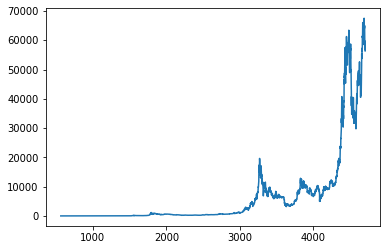

In [ ]:
#plot_btc = btc_price.set_index("date", inplace=True)
#print(plot_btc)
btc_price['PriceUSD'].plot()

In [ ]:
for el in years:
  print(""+ str(el)+ " in USD: Mean price: " + str(round(btc_price[btc_price['year'] == str(el)]['PriceUSD'].mean(), 2)) +
        ",  Variance: " +str(round(btc_price[btc_price['year'] == str(el)]['PriceUSD'].std(), 2)))
  if years.index(el) !=0:
    V1 = btc_price[btc_price['year'] == str(el-1)]['PriceUSD'].mean()
    V2 = btc_price[btc_price['year'] == str(el)]['PriceUSD'].mean()
    print("Price change: " + str(round((V2 - V1)/abs(V1) * 100, 2)) + " %")


2010 in USD: Mean price: 0.14,  Variance: 0.09
2011 in USD: Mean price: 5.64,  Variance: 5.61
Price change: 3885.33 %
2012 in USD: Mean price: 8.29,  Variance: 3.21
Price change: 46.97 %
2013 in USD: Mean price: 188.86,  Variance: 244.42
Price change: 2177.8 %
2014 in USD: Mean price: 525.17,  Variance: 143.61
Price change: 178.08 %
2015 in USD: Mean price: 272.88,  Variance: 59.18
Price change: -48.04 %
2016 in USD: Mean price: 568.2,  Variance: 138.92
Price change: 108.22 %
2017 in USD: Mean price: 3994.49,  Variance: 4026.87
Price change: 603.01 %
2018 in USD: Mean price: 7519.17,  Variance: 2421.41
Price change: 88.24 %
2019 in USD: Mean price: 7365.21,  Variance: 2651.35
Price change: -2.05 %
2020 in USD: Mean price: 11119.06,  Variance: 4311.46
Price change: 50.97 %
2021 in USD: Mean price: 47026.24,  Variance: 10184.25
Price change: 322.93 %


# **Daily predictive power of the crypto**

**Daily return difference by year**

```
# This is formatted as code
```

**

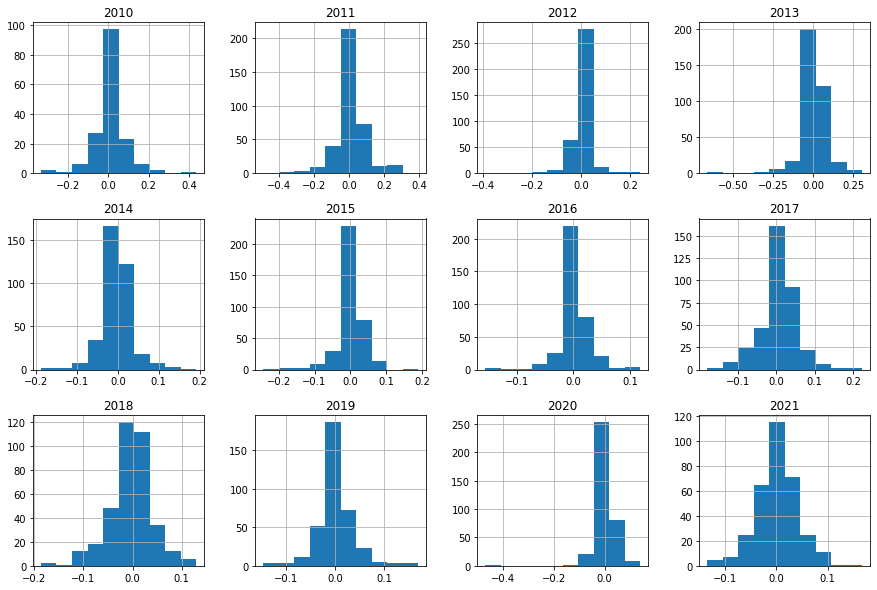

In [ ]:

#matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)


fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8), (ax9, ax10, ax11, ax12)) = plt.subplots(ncols=4, nrows=3,figsize=(15, 10))
axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12]
for idx, el in enumerate(years):
  btc_price[btc_price['year'] == str(el)].hist('log_diff', ax=axes[idx])
  axes[idx].set_title(str(el))


# **TIME SERIES ANALYSIS**

**Autocorrelation**

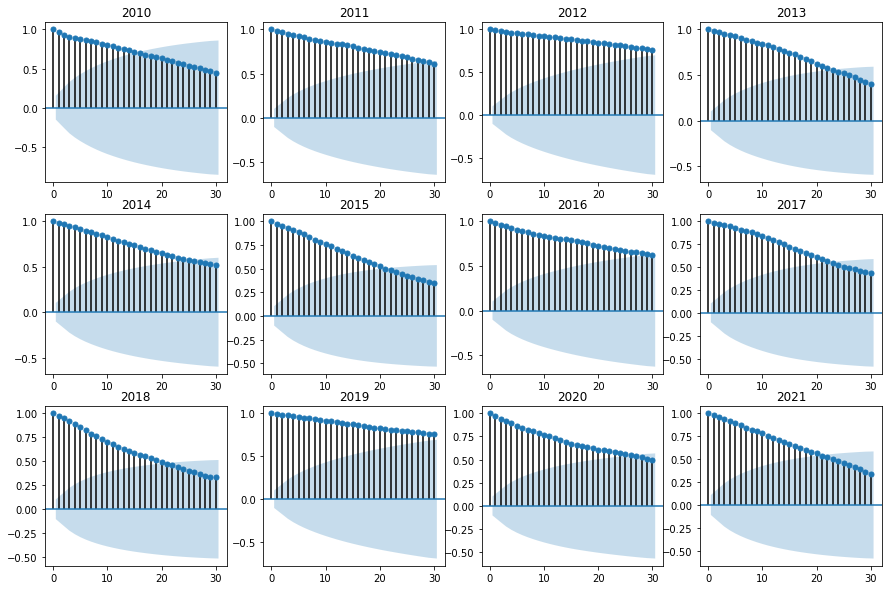

In [ ]:
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8), (ax9, ax10, ax11, ax12)) = plt.subplots(ncols=4, nrows=3,figsize=(15, 10))
axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12]
for idx, el in enumerate(years):
  plot_acf(btc_price[btc_price['year'] == str(el)]['PriceUSD'],  lags=30, ax=axes[idx])
  axes[idx].set_title(str(el))

**Partial Autocorrelation**

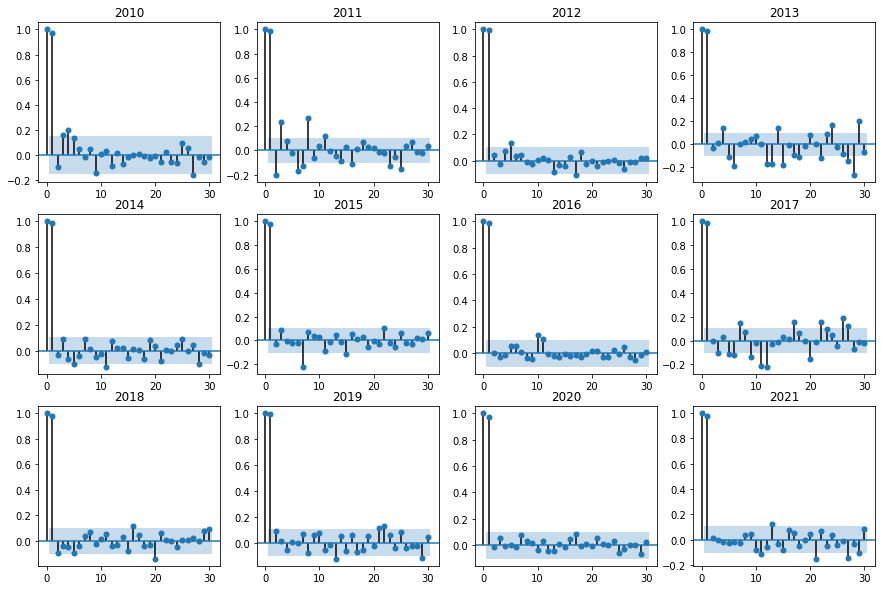

In [ ]:
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8), (ax9, ax10, ax11, ax12)) = plt.subplots(ncols=4, nrows=3,figsize=(15, 10))
axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12]
for idx, el in enumerate(years):
  plot_pacf(btc_price[btc_price['year'] == str(el)]['PriceUSD'],  lags=30, ax=axes[idx])
  axes[idx].set_title(str(el))

**Autocorrelation and Partial Autocorrelation for the whole time**

Text(0.5, 1.0, 'Parcial autocorrelation')

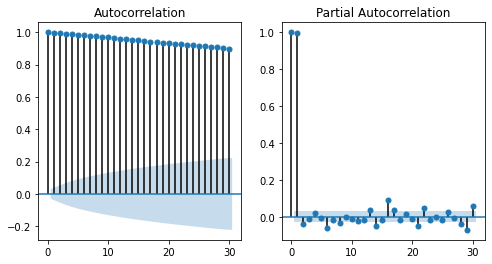

In [ ]:
fig, ((ax1, ax2)) = plt.subplots(ncols=2, nrows=1,figsize=(8, 4))
plot_acf(btc_price['PriceUSD'],  lags=30, ax=ax1)
axes[idx].set_title("Autocorrelation")
plot_pacf(btc_price['PriceUSD'],  lags=30, ax=ax2)
axes[idx].set_title("Parcial autocorrelation")

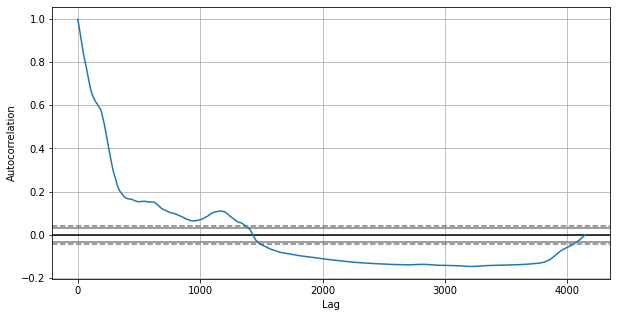

In [ ]:
fig, ((ax1)) = plt.subplots(ncols=1, nrows=1, figsize=(10, 5))
pd.plotting.autocorrelation_plot(btc_price['PriceUSD'], ax = ax1)

In [ ]:
btc_price.head()

,date,PriceUSD,t-1,year,log_diff,change%,target
562,2010-07-19,0.080800,0.085840,2010,-0.060508,-6.05,0
563,2010-07-20,0.074736,0.080800,2010,-0.078019,-7.80,0
564,2010-07-21,0.079193,0.074736,2010,0.057928,5.79,1
565,2010-07-22,0.058470,0.079193,2010,-0.303376,-30.34,0
566,2010-07-23,0.060593,0.058470,2010,0.035668,3.57,1


In [ ]:
btc_price['PriceUSD']

564         0.079193
565         0.058470
566         0.060593
567         0.054540
568         0.050541
            ...     
4702    56794.155627
4703    58014.072989
4704    59749.473823
4705    59032.624102
4706    56383.565876
Name: PriceUSD, Length: 4143, dtype: float64

Prediction


In [ ]:
btc_price['PriceUSD']

564         0.079193
565         0.058470
566         0.060593
567         0.054540
568         0.050541
            ...     
4702    56794.155627
4703    58014.072989
4704    59749.473823
4705    59032.624102
4706    56383.565876
Name: PriceUSD, Length: 4143, dtype: float64

In [ ]:
btc_price['PriceUSD']

564         0.079193
565         0.058470
566         0.060593
567         0.054540
568         0.050541
            ...     
4702    56794.155627
4703    58014.072989
4704    59749.473823
4705    59032.624102
4706    56383.565876
Name: PriceUSD, Length: 4143, dtype: float64

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X, y)

# **SOURCES:**


*   https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/
*   https://pythondata.com/forecasting-time-series-autoregression/
* https://otexts.com/fpp2/what-can-be-forecast.html
